In [124]:
import numpy as np
import pandas as pd

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [198]:
zomato=pd.read_csv('Zomato data .csv')

In [200]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [218]:
def fraction_to_float(rate):
    numerator,denominator=map(float,rate.split('/'))
    return numerator/denominator

In [220]:
zomato['rate']=zomato['rate'].apply(fraction_to_float)

In [222]:
zomato

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,0.82,775,800,Buffet
1,Spice Elephant,Yes,No,0.82,787,800,Buffet
2,San Churro Cafe,Yes,No,0.76,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,0.74,88,300,Buffet
4,Grand Village,No,No,0.76,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,0.66,0,100,Dining
144,New Indraprasta,No,No,0.66,0,150,Dining
145,Anna Kuteera,Yes,No,0.80,771,450,Dining
146,Darbar,No,No,0.60,98,800,Dining


In [138]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of Restaurant')

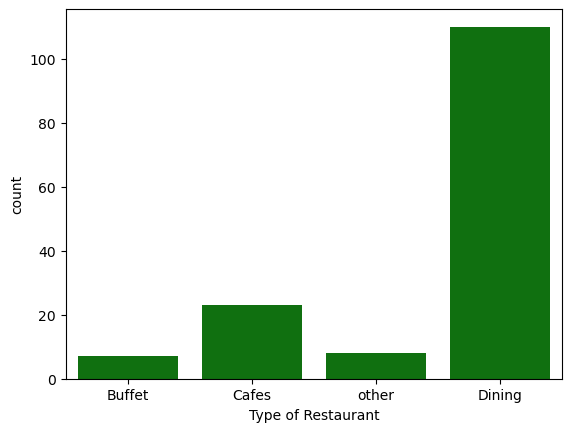

In [140]:
sns.countplot(data=zomato,x='listed_in(type)',color='green')
plt.xlabel('Type of Restaurant')

In [174]:
grouped_data = zomato.groupby('listed_in(type)')['votes'].sum()
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [176]:
result = pd.DataFrame({'votes': grouped_data})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

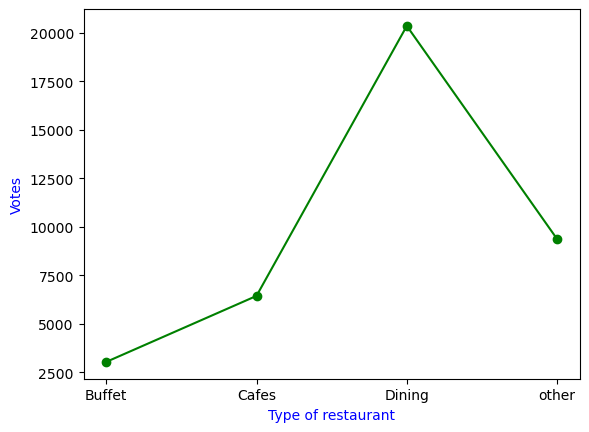

In [172]:
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="blue", size=10)
plt.ylabel("Votes", c="blue", size=10)

In [224]:
max_index=zomato['votes'].idxmax()

In [226]:
max_row=zomato.loc[max_index]

In [228]:
max_row

name                           Empire Restaurant
online_order                                 Yes
book_table                                    No
rate                                        0.88
votes                                       4884
approx_cost(for two people)                  750
listed_in(type)                            other
Name: 38, dtype: object

Text(0.5, 0, 'Online Ordering')

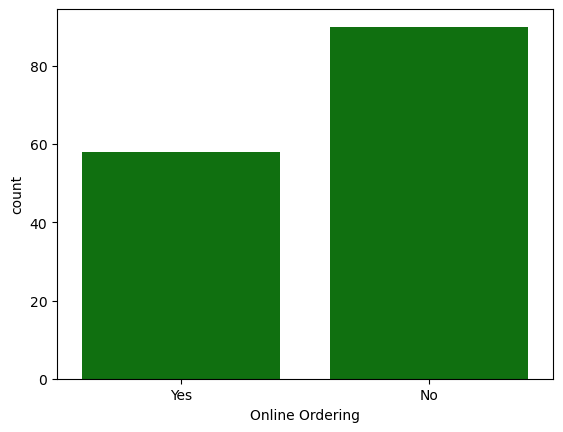

In [230]:
sns.countplot(data=zomato,x='online_order',color='green')
plt.xlabel('Online Ordering')

Text(0.5, 1.0, 'Ratings of Reastaurant')

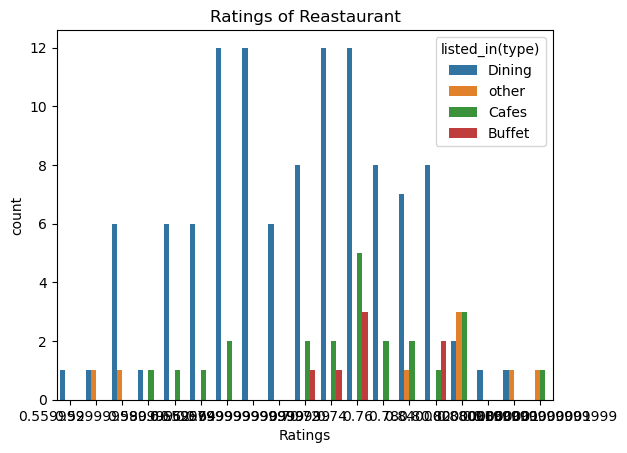

In [244]:
sns.countplot(data=zomato,x='rate',hue='listed_in(type)')
plt.xlabel('Ratings')
plt.title('Ratings of Reastaurant')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6444\442904694.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zomato['rate'],kde=False,bins=10,color='darkred')


Text(0.5, 1.0, 'Ratings of Reastaurant')

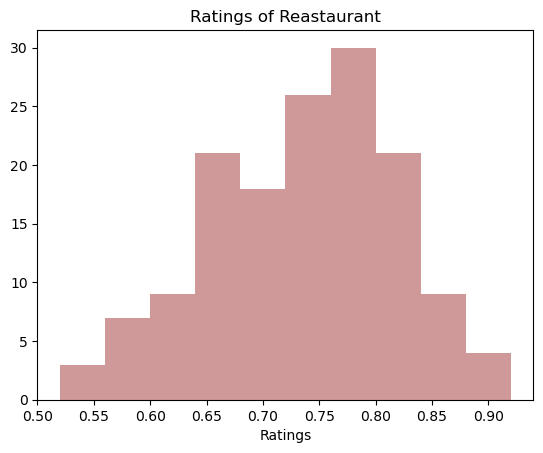

In [256]:
sns.distplot(zomato['rate'],kde=False,bins=10,color='darkred')
plt.xlabel('Ratings')
plt.title('Ratings of Reastaurant')

Text(0.5, 1.0, 'Ratings of Reastaurant')

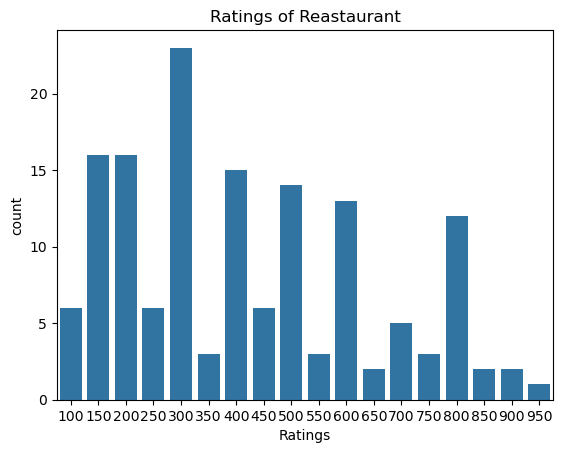

In [258]:
sns.countplot(data=zomato,x='approx_cost(for two people)')
plt.xlabel('Ratings')
plt.title('Ratings of Reastaurant')

<Axes: xlabel='online_order', ylabel='rate'>

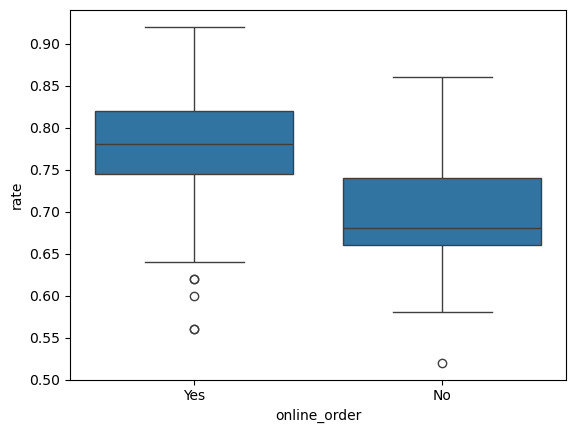

In [267]:
sns.boxplot(data=zomato,x='online_order',y='rate')

Text(0.5, 1.0, 'Online vs Offline')

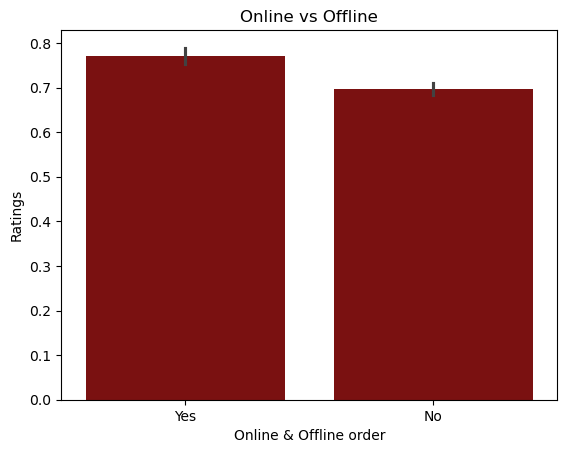

In [271]:
sns.barplot(data=zomato,x='online_order',y='rate',color='darkred')
plt.xlabel('Online & Offline order')
plt.ylabel('Ratings')
plt.title('Online vs Offline')

In [287]:
pivot=zomato.pivot_table(zomato,index='listed_in(type)',columns='online_order',aggfunc='size')

In [289]:
pivot

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


Text(0.5, 1.0, 'Online vs Offline')

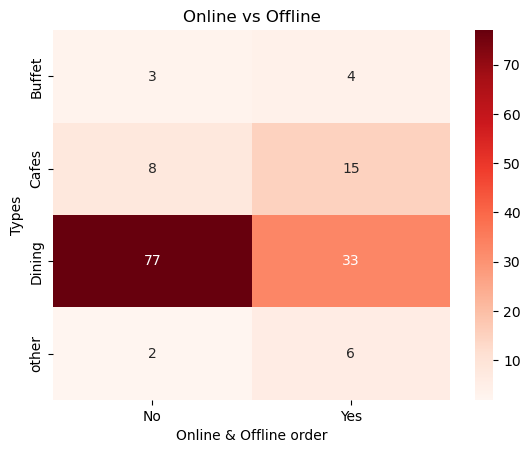

In [295]:
sns.heatmap(pivot,annot=True,cmap='Reds')
plt.xlabel('Online & Offline order')
plt.ylabel('Types')
plt.title('Online vs Offline')